[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None
Sentiment
Negative      22542
Positive      20832
Neutral       1831

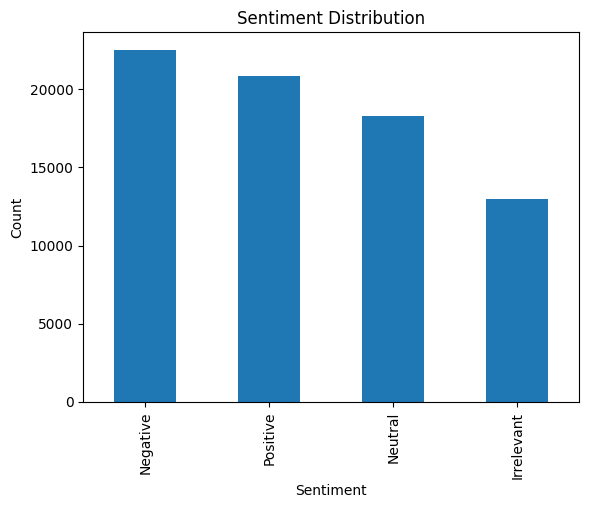

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Assuming you have uploaded 'twitter_data.csv' to your Colab environment
# Replace 'twitter_data.csv' with the actual file name if it's different.
file_path = 'twitter_data.csv'

try:
  # Load dataset
  column_names = ["ID", "Topic", "Sentiment", "Text"]
  df = pd.read_csv(file_path, names=column_names, header=None)

  # Explore dataset
  print(df.head())
  print(df.info())
  print(df['Sentiment'].value_counts())  # Check sentiment distribution

  # Preprocessing function
  def preprocess_text(text):
      text = text.lower()  # Convert to lowercase
      text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
      text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
      words = word_tokenize(text)
      words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
      return ' '.join(words)

  # Apply preprocessing
  df['Cleaned_Text'] = df['Text'].fillna("").apply(preprocess_text)

  # Split features and target
  X = df['Cleaned_Text']
  y = df['Sentiment']

  # Convert text data into TF-IDF features
  tfidf_vectorizer = TfidfVectorizer(max_features=5000)
  X_tfidf = tfidf_vectorizer.fit_transform(X)

  # Split dataset into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

  # Train Naive Bayes classifier
  nb_model = MultinomialNB()
  nb_model.fit(X_train, y_train)

  # Predictions
  y_pred = nb_model.predict(X_test)

  # Evaluate model performance
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)
  print("Classification Report:\n", classification_report(y_test, y_pred))
  print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

  # Plot sentiment distribution
  df['Sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
  plt.xlabel('Sentiment')
  plt.ylabel('Count')
  plt.show()

except FileNotFoundError:
  print(f"Error: File '{file_path}' not found. Please upload the CSV file to your Colab environment.")
except Exception as e:
  print(f"An error occurred: {e}")
